In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
plt.rcParams['figure.figsize'] = (20.0, 10.0)

In [3]:
# Reading Data
data = pd.read_csv('headbrain.csv')
print(data.shape)

(237, 4)


In [4]:
print(data)

     Gender  Age Range  Head Size(cm^3)  Brain Weight(grams)
0         1          1             4512                 1530
1         1          1             3738                 1297
2         1          1             4261                 1335
3         1          1             3777                 1282
4         1          1             4177                 1590
..      ...        ...              ...                  ...
232       2          2             3214                 1110
233       2          2             3394                 1215
234       2          2             3233                 1104
235       2          2             3352                 1170
236       2          2             3391                 1120

[237 rows x 4 columns]


In [5]:
data.head()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [6]:
# Collecting X and Y
X = data['Head Size(cm^3)'].values
Y = data['Brain Weight(grams)'].values

In [7]:
mean_x = np.mean(X)
mean_y = np.mean(Y)

In [8]:
print(mean_x, mean_y)

3633.9915611814345 1282.873417721519


In [9]:
# Total no. of values
items = len(X)
items

237

### Solve for b1 and b0
### b1 is m where 

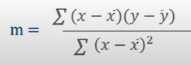

### b0 is c 
### c = mean_y - (b1 * mean_x)

In [10]:
# solve for b1 or m
numerator = 0
denominator = 0

for i in range(items):
    numerator += (X[i] - mean_x) * (Y[i] - mean_y)
    denominator += (X[i] - mean_x) ** 2
print(numerator, denominator)

8294376.74683544 31486153.983122338


In [11]:
b1 = numerator / denominator
#b1 = 0.28
b0 = mean_y - (b1 * mean_x)

In [12]:
# Print Coefficients
print(b1, b0)

# 0.26342933948939945 325.57342104944223 where b1 = numerator / denominator
# 0.27 301.6956962025316 where b1 = 0.27

0.26342933948939945 325.57342104944223


In [13]:
# print y predicted values
# y = mx + c

for i in range(items):
    y_prediction = b1 * X[i] + b0
    print(y_prediction)

1514.1666008256125
1310.2722920608173
1448.0458366137732
1320.546036300904
1425.9177720966638
1269.9676031189392
1322.6534710168191
1263.118440292215
1277.3436246246424
1374.549050896231
1232.5606369114446
1377.4467736306142
1284.4562167908562
1434.0840816208351
1335.034649972821
1346.6255409103546
1246.785821243872
1238.6195117197008
1140.8872267691336
1490.9848189505453
1347.1523995893333
1391.4085286235525
1327.6586284671178
1302.8962705551141
1576.0724956056215
1490.721389611056
1388.7742352286584
1385.0862244758068
1235.4583596458278
1425.390913417685
1323.1803296957978
1325.5511937512024
1406.424000974448
1421.7029026648333
1420.9126146463652
1330.2929218620118
1254.688701428554
1312.9065854557114
1203.8468389071
1245.468674546425
1369.2804641064429
1248.8932559597874
1462.271020946201
1327.6586284671178
1343.2009594969923
1388.2473765496795
1460.427015569775
1159.3272805333913
1284.7196461303456
1285.509934148814
1350.5769810026954
1324.7609057327345
1450.4167006691778
1395.8868

In [14]:
# Plotting values and regression line

max_x = np.max(X) + 100
min_x = np.min(X) - 100

# Calculating the line values x and y
x = np.linspace(min_x, max_x, 1000)   # linspace creates sequences of evenly spaced values within a defined interval
y = b0 + b1 * x                       # y_predicted values
print(y)


[1015.75829051 1016.3455349  1016.93277928 1017.52002366 1018.10726805
 1018.69451243 1019.28175681 1019.8690012  1020.45624558 1021.04348996
 1021.63073435 1022.21797873 1022.80522311 1023.3924675  1023.97971188
 1024.56695626 1025.15420065 1025.74144503 1026.32868941 1026.9159338
 1027.50317818 1028.09042256 1028.67766695 1029.26491133 1029.85215571
 1030.4394001  1031.02664448 1031.61388886 1032.20113325 1032.78837763
 1033.37562201 1033.9628664  1034.55011078 1035.13735516 1035.72459955
 1036.31184393 1036.89908832 1037.4863327  1038.07357708 1038.66082147
 1039.24806585 1039.83531023 1040.42255462 1041.009799   1041.59704338
 1042.18428777 1042.77153215 1043.35877653 1043.94602092 1044.5332653
 1045.12050968 1045.70775407 1046.29499845 1046.88224283 1047.46948722
 1048.0567316  1048.64397598 1049.23122037 1049.81846475 1050.40570913
 1050.99295352 1051.5801979  1052.16744228 1052.75468667 1053.34193105
 1053.92917543 1054.51641982 1055.1036642  1055.69090858 1056.27815297
 1056.86

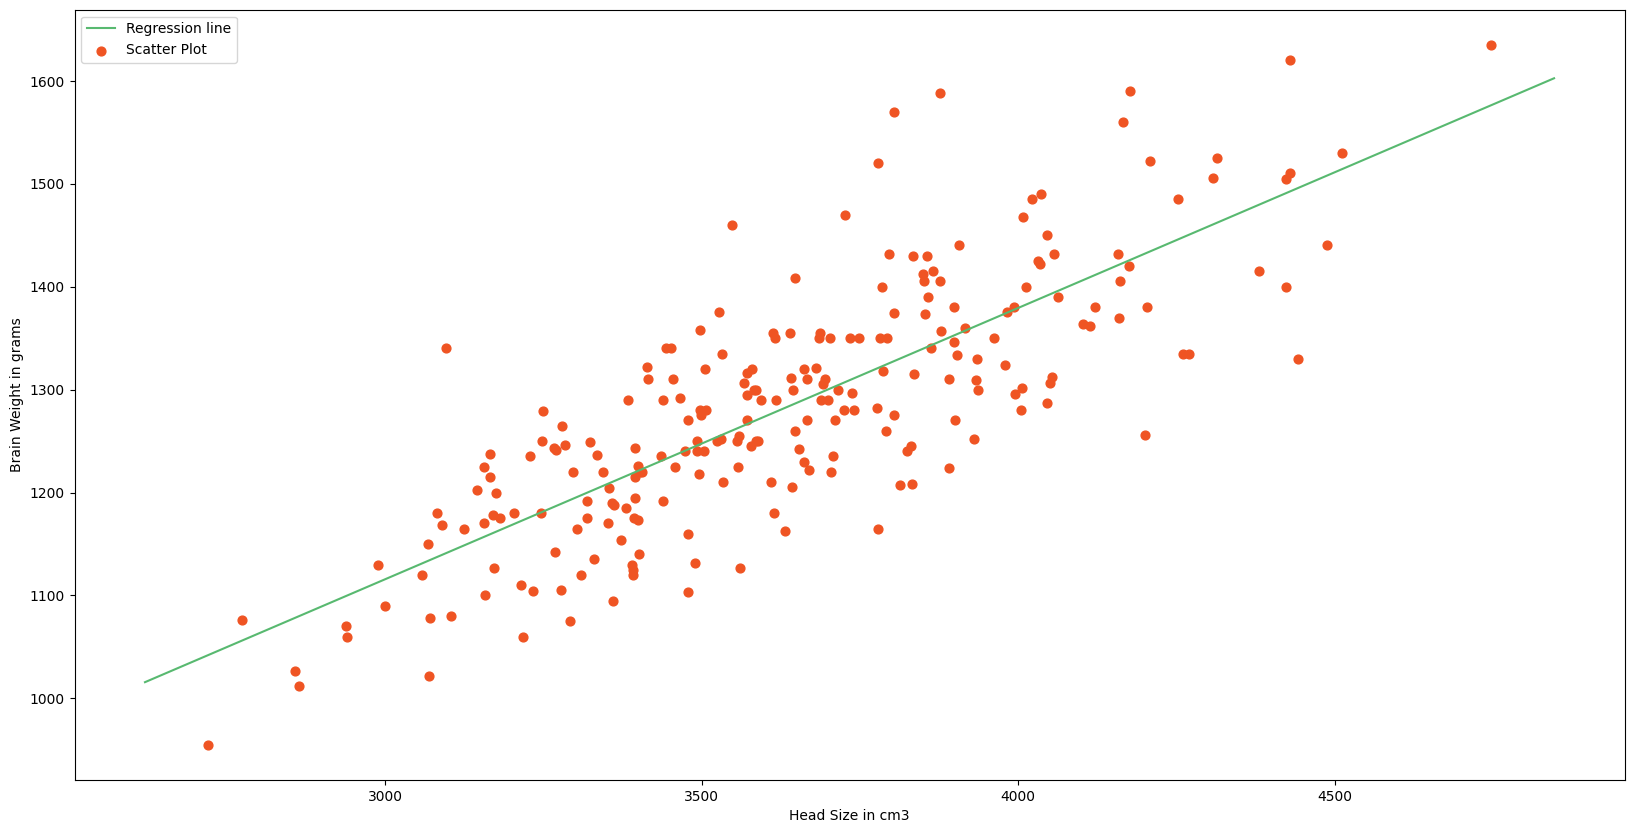

In [15]:
# Plotting the line

plt.plot(x, y, color = '#58b970', label = 'Regression line')


# Plotting the scatter points
plt.scatter(X, Y, c = '#ef5423', label = 'Scatter Plot', s = 40)

plt.xlabel('Head Size in cm3')
plt.ylabel('Brain Weight in grams')
plt.legend()
plt.show()

In [21]:
# Check how good our model is using R2 method or coefficient of determination

sum_square_actual = 0
sum_square_predicted = 0
for i in range(items):
    #y_pred_ = y[i]
    y_pred = b0 + b1 * X[i]
    #print(y_pred)
    sum_square_actual += (Y[i] - mean_y) ** 2
    #sum_square_predicted =(y_pred - mean_y) ** 2
    #sum_square_predicted += (Y[i] - y_pred) ** 2
    sum_square_predicted += (y_pred - mean_y) ** 2

r2 = (sum_square_predicted / sum_square_actual)
print(r2)

# 0.26342933948939945 325.57342104944223 where b1 = numerator / denominator
# r2 = 0.6226985655579578

## 0.27 301.6956962025316 where b1 = 0.27
#r2 = 0.6541496414950141

0.6393117199570001


# using scikit-learn

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = X.reshape((items, 1))  
# reshape allows us to reshape an array in Python
# In this case, the desired shape is specified as (items, 1), whiere items no. of records in x 
# which means that the resulting array will have 237 rows and column column

regression = LinearRegression()

# Fitting training data
regression = regression.fit(X,Y)

# Y Prediction
y_pred = regression.predict(X)

# Calculating R2 Score
r2_score = regression.score(X,Y)

print(r2)


0.6393117199570001
